In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [6]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|                                                            | 0/3 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 1 examples [00:01,  1.61s/ examples]
Generating train examples...: 10236 examples [00:02, 4808.60 examples/s]
Generating train examples...: 20588 examples [00:03, 7032.76 examples/s]
                                                                        
Shuffling C:\Users\Lenovo\tensorflow_datasets\imdb_reviews\plain_text\incomplete.AFMHJZ_1.0.0\imdb_reviews-train.t
Generating splits...:  33%|█████████████████▎                                  | 1/3 [00:06<00:13,  6.76s/ splits]
Generating test examples...: 0 examples [00:00, ? examples/s]
Generating test examples...: 5242 examples [00:01, 5237.79 examples/s]
Generating test examples...: 15612 examples [00:02, 8254.49 examples/s]
                                                             

Dataset imdb_reviews downloaded and prepared to C:\Users\Lenovo\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [7]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [8]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [15]:
# embedding = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
# hub_layer = hub.KerasLayer(embedding, input_shape=[],
#                            dtype=tf.string, trainable=True)

In [21]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the embedding model from TensorFlow Hub
embedding_model = hub.load("https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2")

# Create a custom layer to use the embedding model
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, hub_model):
        super(HubLayer, self).__init__()
        self.hub_model = hub_model

    def call(self, inputs):
        return self.hub_model(inputs)

# Define the Input layer
input_text = Input(shape=(), dtype=tf.string, name="input_text")

# Pass input through the custom HubLayer
hub_layer = HubLayer(embedding_model)(input_text)

# Add Dense Layers
hidden_layer = Dense(16, activation='relu')(hub_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)  # Binary classification

# Build the Model
model = Model(inputs=input_text, outputs=output_layer)

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display Summary
model.summary()

# Train the Model
history = model.fit(train_data.batch(512),
                    validation_data=validation_data.batch(512),
                    epochs=10,
                    verbose=1)

# Evaluate the Model
results = model.evaluate(test_data.batch(512), verbose=1)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)              │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hub_layer (HubLayer)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,081 (8.13 KB)

 Trainable params: 2,081 (8.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5148 - loss: 0.7448 - val_accuracy: 0.5987 - val_loss: 0.6618
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6274 - loss: 0.6502 - val_accuracy: 0.7035 - val_loss: 0.5988
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7154 - loss: 0.5850 - val_accuracy: 0.7497 - val_loss: 0.5455
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7537 - loss: 0.5362 - val_accuracy: 0.7714 - val_loss: 0.5098
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7737 - loss: 0.5032 - val_accuracy: 0.7845 - val_loss: 0.4851
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7870 - loss: 0.4802 - val_accuracy: 0.7913 - val_loss: 0.4674
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7962 - loss: 0.4635 - val_accuracy: 0.7980 - val_loss: 0.4542
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7999 - loss: 0.4510 - val_accuracy: 0.8030 - v

In [22]:
import tensorflow as tf
import tensorflow_hub as hub
print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.19.0
TensorFlow Hub version: 0.16.1


In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [27]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=5,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/5
30/30 [==============================] - 11s 214ms/step - loss: 0.7232 - accuracy: 0.6325 - val_loss: 0.5780 - val_accuracy: 0.7499
Epoch 2/5
30/30 [==============================] - 5s 169ms/step - loss: 0.4085 - accuracy: 0.8315 - val_loss: 0.4918 - val_accuracy: 0.8352
Epoch 3/5
30/30 [==============================] - 6s 196ms/step - loss: 0.2579 - accuracy: 0.9123 - val_loss: 0.3613 - val_accuracy: 0.8651
Epoch 4/5
30/30 [==============================] - 6s 190ms/step - loss: 0.1557 - accuracy: 0.9549 - val_loss: 0.4208 - val_accuracy: 0.8821
Epoch 5/5
30/30 [==============================] - 5s 147ms/step - loss: 0.0997 - accuracy: 0.9741 - val_loss: 0.4489 - val_accuracy: 0.8856


In [28]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 2s - 44ms/step - accuracy: 0.8035 - loss: 0.4362
loss: 0.436
compile_metrics: 0.803


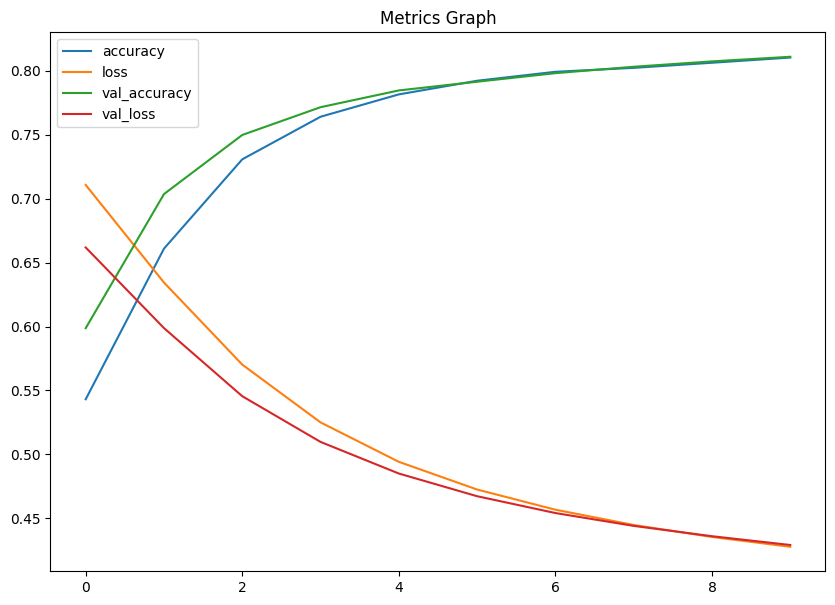

In [30]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [34]:
import tensorflow as tf

# Convert texts to TensorFlow tensors
texts_tensor = tf.convert_to_tensor(texts)

# Use the model to predict probabilities
predicted_probs = model.predict(texts_tensor)

# Print predicted probabilities
print(predicted_probs)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[[0.65427154]
 [0.8688402 ]
 [0.48086572]
 ...
 [0.14798805]
 [0.82856834]
 [0.8277428 ]]


In [35]:
predicted_labels = (predicted_probs > 0.5).astype(int)

In [36]:
report = metrics.classification_report(true_labels, predicted_labels, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.79      0.82      0.81     12500
    Positive       0.82      0.78      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



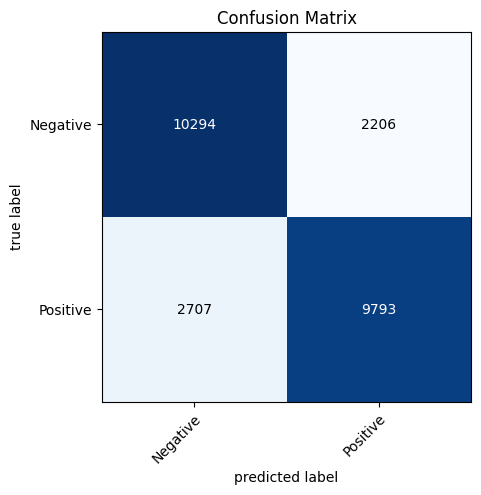

In [37]:
cm = metrics.confusion_matrix(true_labels, predicted_labels)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()